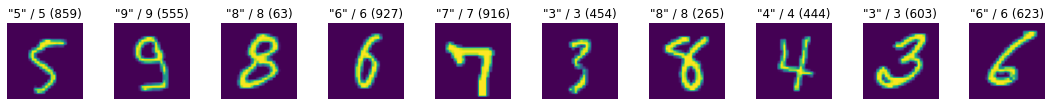

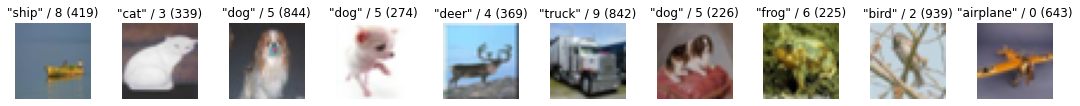

In [79]:
def fetch_tfds_as_np(name, split):
    import operator
    import numpy as np
    import tensorflow_datasets as tfds

    X, Y = operator.itemgetter("image", "label")(
        tfds.as_numpy(tfds.load(name=name, split=split,
                                data_dir=".data/", batch_size=-1)))
    X = X.astype(np.float64) / 255
    return X, Y


def fetch_tfds_info(name):
    import tensorflow_datasets as tfds

    _, info = tfds.load(name=name, split="train[:1]", data_dir=".data/",
                        batch_size=-1, with_info=True)
    return info.features["label"].names


def show_image_d(X, Y, names=None, samples=(1, 10)):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(samples[1] * 1.5, samples[0] * 1.5))
    for i in range(samples[0]):
        for j in range(samples[1]):
            idx = np.random.randint(len(Y))
            plt.subplot(*samples, i * samples[1] + j + 1)
            plt.imshow(np.clip(X[idx], 0, 1))
            plt.title("\"{}\" / {} ({})".format(
                Y[idx] if names is None else names[Y[idx]], Y[idx], idx))
            plt.axis("off")
    plt.tight_layout()
    plt.show()


show_image_d(*fetch_tfds_as_np("mnist", "train[:1024]"))
show_image_d(*fetch_tfds_as_np("cifar10", "train[:1024]"),
             fetch_tfds_info("cifar10"))


In [93]:
import numpy as np
from sklearn import svm


def flatten_XY(X, Y):
    return np.reshape(X, (X.shape[0], -1)), Y


def calc_svc_acc(svc, X, Y):
    return np.count_nonzero(Y == svc.predict(X)) / len(Y)


def print_svc_acc_grid_c(dataset_name, **kwargs):
    print(dataset_name, kwargs)
    for i in np.logspace(-5, 5, num=10):
        svc = svm.SVC(C=i, **kwargs).fit(
            *flatten_XY(*fetch_tfds_as_np(dataset_name, "train[:1024]")))
        print("C={:.2E} => acc={:.4f}".format(i, calc_svc_acc(
            svc, *flatten_XY(*fetch_tfds_as_np(dataset_name, "test[:1024]")))))


print_svc_acc_grid_c("mnist", gamma="scale")
print_svc_acc_grid_c("cifar10", gamma="scale")


mnist {'gamma': 'scale'}
C=1.00E-05 => acc=0.0986
C=1.29E-04 => acc=0.0986
C=1.67E-03 => acc=0.0986
C=2.15E-02 => acc=0.0996
C=2.78E-01 => acc=0.8965
C=3.59E+00 => acc=0.9355
C=4.64E+01 => acc=0.9346
C=5.99E+02 => acc=0.9346
C=7.74E+03 => acc=0.9346
C=1.00E+05 => acc=0.9346
cifar10 {'gamma': 'scale'}
C=1.00E-05 => acc=0.1123
C=1.29E-04 => acc=0.1123
C=1.67E-03 => acc=0.1123
C=2.15E-02 => acc=0.1123
C=2.78E-01 => acc=0.2979
C=3.59E+00 => acc=0.3730
C=4.64E+01 => acc=0.3789
C=5.99E+02 => acc=0.3789
C=7.74E+03 => acc=0.3789
C=1.00E+05 => acc=0.3789


In [94]:
print_svc_acc_grid_c("mnist", kernel="linear")
print_svc_acc_grid_c("cifar10", kernel="linear")


mnist {'kernel': 'linear'}
C=1.00E-05 => acc=0.0986
C=1.29E-04 => acc=0.0986
C=1.67E-03 => acc=0.8281
C=2.15E-02 => acc=0.9072
C=2.78E-01 => acc=0.8965
C=3.59E+00 => acc=0.8975
C=4.64E+01 => acc=0.8975
C=5.99E+02 => acc=0.8975
C=7.74E+03 => acc=0.8975
C=1.00E+05 => acc=0.8975
cifar10 {'kernel': 'linear'}
C=1.00E-05 => acc=0.1123
C=1.29E-04 => acc=0.1357
C=1.67E-03 => acc=0.3164
C=2.15E-02 => acc=0.3301
C=2.78E-01 => acc=0.2900
C=3.59E+00 => acc=0.2920
C=4.64E+01 => acc=0.2920
C=5.99E+02 => acc=0.2920
C=7.74E+03 => acc=0.2920
C=1.00E+05 => acc=0.2920


In [95]:
print_svc_acc_grid_c("mnist", degree=2, kernel="poly")
print_svc_acc_grid_c("cifar10", degree=2, kernel="poly")
print_svc_acc_grid_c("mnist", degree=3, kernel="poly")
print_svc_acc_grid_c("cifar10", degree=3, kernel="poly")
print_svc_acc_grid_c("mnist", degree=4, kernel="poly")
print_svc_acc_grid_c("cifar10", degree=4, kernel="poly")


mnist {'degree': 2, 'kernel': 'poly'}
C=1.00E-05 => acc=0.0986
C=1.29E-04 => acc=0.0986
C=1.67E-03 => acc=0.0986
C=2.15E-02 => acc=0.3760
C=2.78E-01 => acc=0.8682
C=3.59E+00 => acc=0.9170
C=4.64E+01 => acc=0.9102
C=5.99E+02 => acc=0.9102
C=7.74E+03 => acc=0.9102
C=1.00E+05 => acc=0.9102
cifar10 {'degree': 2, 'kernel': 'poly'}
C=1.00E-05 => acc=0.1123
C=1.29E-04 => acc=0.1123
C=1.67E-03 => acc=0.1309
C=2.15E-02 => acc=0.2441
C=2.78E-01 => acc=0.3428
C=3.59E+00 => acc=0.3262
C=4.64E+01 => acc=0.3232
C=5.99E+02 => acc=0.3232
C=7.74E+03 => acc=0.3232
C=1.00E+05 => acc=0.3232
mnist {'degree': 3, 'kernel': 'poly'}
C=1.00E-05 => acc=0.0986
C=1.29E-04 => acc=0.0986
C=1.67E-03 => acc=0.0986
C=2.15E-02 => acc=0.4004
C=2.78E-01 => acc=0.8389
C=3.59E+00 => acc=0.8877
C=4.64E+01 => acc=0.8906
C=5.99E+02 => acc=0.8906
C=7.74E+03 => acc=0.8906
C=1.00E+05 => acc=0.8906
cifar10 {'degree': 3, 'kernel': 'poly'}
C=1.00E-05 => acc=0.1123
C=1.29E-04 => acc=0.1123
C=1.67E-03 => acc=0.2139
C=2.15E-02 => acc=0